# 1. Predict Loan Approval (DecisionTreeClassifier)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
loandata = pd.DataFrame(pd.read_csv('cleaned_loan_data.csv'))
loandata.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,assets,loan_status
0,2,1,0,9600000,29900000,12,778,50700000,1
1,0,0,1,4100000,12200000,8,417,17000000,0
2,3,1,0,9100000,29700000,20,506,57700000,0
3,3,1,0,8200000,30700000,8,467,52700000,0
4,5,0,1,9800000,24200000,20,382,55000000,0


# Train the Model

In [3]:
x = loandata.iloc[:, :8]
y = loandata.iloc[:, 8]

In [4]:
y.value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [5]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train Logistic Regression model
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [7]:
# Evaluate the model
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy, "\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9707259953161592 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       317
           1       0.96      0.99      0.98       537

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



In [8]:
# do a test prediction
test_data = [[1, 0, 0, 6000000, 40000000, 12, 721, 40000000]]
test_data = scaler.transform(test_data)
prediction = model.predict(test_data)
print(prediction)

[1]


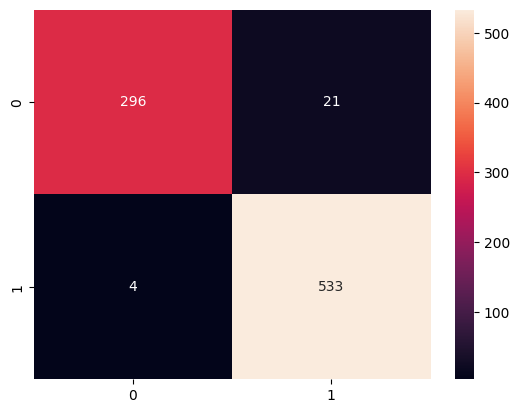

In [9]:
# draw the confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.show()

In [10]:
y_pred_probs = model.predict_proba(x_test)[:, 1] # keep probabilities for the positive outcome only

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs) #we are goint to produce the ROC curve

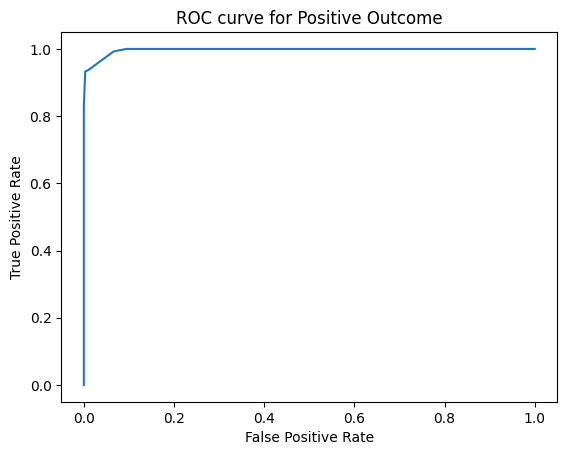

In [12]:
plt.plot(fpr, tpr)
plt.title('ROC curve for Positive Outcome')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Build the Model

In [13]:
import pickle as pk
pk.dump(model, open('model_1.pkl','wb'))
pk.dump(scaler, open('scaler_1.pkl','wb'))